## Red Wine Quality
### Dataset Types:-Classification
### Model Built :- Logistic, SVC, Decision Tree, Random Forest, Hyperparameter, XG Boost, Bagging
### Dataset Reference:- https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

### Importing the library

In [49]:
!pip install summarytools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from summarytools import dfSummary

### Inserting Dataset

In [2]:
data= pd.read_csv('winequality-red.csv')

In [3]:

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



## Domain Analysis
1. Fixed acidity:- Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

2. Volitile acidity:- The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
Citric acid	Found in small quantities, citric acid can add 'freshness' and flavor to wines.

3. Residual sugar:- it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

4. Chlorides:- The amount of salt in the wine.

5. Free sulphur dioxide:- 	The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

6. Total sulphur dioxide:- Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

7. Density:- The density of water is close to that of water depending on the percent alcohol and sugar content.

8. pH:- Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

9. Sulphates	Wine:- Additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

10. Alcohol:- The percentage of alcohol contents in the wine.

# Basic Checks

In [ ]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,fixed acidity[float64],Mean (sd) : 8.3 (1.7)min < med < max:4.6 < 7.9 < 15.9IQR (CV) : 2.1 (4.8),96 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnUlEQVR4nO3du47aQBSA4TOwIHORLUQEHU3KSCkoeYg8bB4hSDwBbSo6JAsZ4WBhjFNtmrBcxuNljvV//SxT/LJ2ZB+NKctSAN+1Xr0B4BFvr97ALcaYnoh0LZefyrI8utwPXsfbUI0xvfF4/CMMw5HN+v1+vzPG/CTWZvA2VBHphmE4WiwWxyiKsmcWJkkSrFarURzHXREh1AbwOVQREYmiKJtMJn8slvacbwYvw2EKKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqeP+Fv62iKDoiEhpjbP8Ew4EeaWSoaZp28jz/PpvN2u12+6l5q3cMB/qlkaGeTqe3IAj68/k8m06nu2fXMxzon0aG+m4wGNgOBoowHOgVDlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSrU+plfxet3wsvl0nG5H+hVW6hVr9/J8zwoiuJblmW/RMT2m1I0RJ1PVOvrd0RENpvNaL1e98/nc7uOzUGX2r/wt71+Z7fb8YU9/uEwBRUaPTNVRcVxa0atHSPUK6qOWzNq7R6hXlFl3JpR63oQ6g0Vxq05CDrGYQoqECpUIFSoQKhQgVChAqf+GvCywD1CdYyXBfUgVMd4WVAPQq0JLwvc4jAFFXiieoZLMq4jVI9wScbHCNUjXJLxsbuhVpgkZYrUEpdk/O9mqFUmSZkihUv3nqjWk6RMkcKlh/5HtZkkZYr0NZr6+pbDVIM0+fUtoTZI1de3y+VyEsfxF2PM3nILLRG5WK69+TR/KNQkSYJnf/VwOAQiImmaBtvttv+Z67X+tqt92zgej5WexkVRdNI0/TocDn+3Wq382fX3nuZ/AbiTgEtJ+TsoAAAAAElFTkSuQmCC"">",0(0.0%)
2,volatile acidity[float64],Mean (sd) : 0.5 (0.2)min < med < max:0.1 < 0.5 < 1.6IQR (CV) : 0.2 (2.9),143 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiUlEQVR4nO3dTY6iQBiA4a/GP/wJxJjozgtMMguXHGIOO0dw4Qm8gTsTQzAyzYjArJx0Mj3dQhUjH/0++0IWb+iiinSZsiwFaLsvz74B4BH9Z99AU4wxYxEZWlziWpbli6v7gZ1OhmqMGS8Wi+++78/rXuN8PkfGmB/E2g6dDFVEhr7vz8MwfAmCIK06OI5jb7fbzU+n01BECLUFuhqqiIgEQZAul8ufNYePnd4MrPAyBRUIFSoQKlQgVKjQ6pcpi7VQvyiKgev7wfO0NlSbtdAsy7w8z7+maboVkbpv/WiRRkO13B3yZ7PZMgzDc9W10MPhMN/v95Pb7dar+dtomcZCtd0duj8VR6PRtupaaBRFrIF2TJNPVKvdIZ6KeK3xOWrd3SGeiniN5SmoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVGjtYRPPluf5QER8Y0yd4ZxM7RihviFJkkGWZd/W63Wv1+tV/rfunEztHqG+4Xq99j3Pm2w2m3S1WkVVxnIydTMI9R3T6bTu6dScP+AYL1NQgVChAqFCBUKFCoQKFQgVKhAqVPhwHdXiKHO/KIpBjXHAX94N1eYo8/sx5mmabkWkzqI58MdHT9TaR5lzjDlcemgLtc5R5p/5GHO+vHKPvX7H+PKqGYTqGF9eNYNQG8KXV24RastYzm9FOjrHJdQWsZ3finR3jkuoLWIzvxXp9hz3oVDjOPaqXvhyuXgiIkmSeMfjcfI/x2v97ftYG3me98Vu6vAsv8qy/Odfkd+3nScJ/aVy7AAAAABJRU5ErkJggg=="">",0(0.0%)
3,citric acid[float64],Mean (sd) : 0.3 (0.2)min < med < max:0.0 < 0.3 < 1.0IQR (CV) : 0.3 (1.4),80 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACgUlEQVR4nO3cMY7aQBSA4TdhIQNENogEOlqKSCkoOUQOmyOkoKXhBnRIBhnh4MUYp4gSrRR2wTZe5ln/V+/YFD+7GvvNmizLBHDdh0d/AOAWT9d+wBjTFpFWwesfsyw7FFwL/PNmqMaY9mAw+O55Xr/IxXe73dYY84NYUda136gtz/P6s9ns4Pt+nOfCYRja+XzeD4KgJSKEilKu/ukXEfF9Px4Oh78KXL9dYA3wHzZTUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUKFm971PwojhvjL2VAZMcRLzoYqjBjiBZdDFRFGDPEHmymoQKhQgVChAqFCBUKFCs7v+h+Flw1uIdQLeNngHkK9jJcNjiHUN/CywR1spqACoUIFQoUKhAoVCBUqVLrrT9O0KSKeMabIcu98Pjc13hv3V1moURQ1kyT5Nh6PG41GI9ezSBGRJElsmqZf4zj+KSK5HhE98t6oRmWhHo/HJ2ttZzqdxqPRaJt3/Wq16i+Xy87pdGpoujeqUfkD/263W+ih+Xa7Lf3Q/JH3xn2xmYIKhAoVCBUqECpUIFSoQKhQgVChAqFCBSb8K1ByzoCDgRcQ6p2VnTPgYOBlhHpnZeYMOBj4OkKtSNE5A+Fg4EVspqACoUIFQoUKhAoVCBUqECpUIFSoQKhQgQf+jik5JyBS01kBQnVI2TkBkfrOChCqQ8r+P4I6zwoQqoNKzAmI1HRWgM0UVCBUqECoUIFQoQKbqZqp63ktQq2ROp/XuinUMAxt3gvv93srIhJFkV2v1533XK/13mU/92az+WSt7UwmE9Pr9Z7zrD0cDh8Xi8WXIAg+G2N2ee99B89Zlr365foNRqpjgXEhTmwAAAAASUVORK5CYII="">",0(0.0%)
4,residual sugar[float64],Mean (sd) : 2.5 (1.4)min < med < max:0.9 < 2.2 < 15.5IQR (CV) : 0.7 (1.8),91 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Insights
1. In this datset we are going to predict alchol(regression) and quality(classification).
2. 240 duplicates values need to be modified.
3. No missing values.
4. All Columns are numeric(float type) and quality is only int type.
5. The wine quality can be between 0 and 10, but in this dataset, the quality values are between 3 and 8. Let's look at the distribution of examples by the wine quality.


### EDA

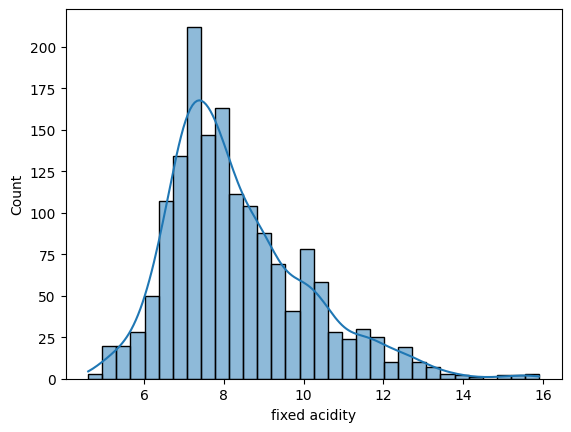

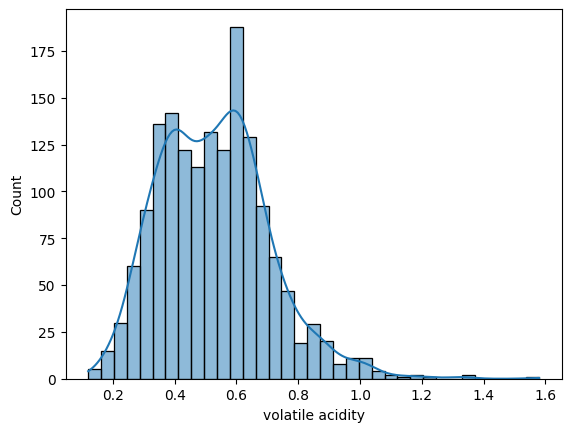

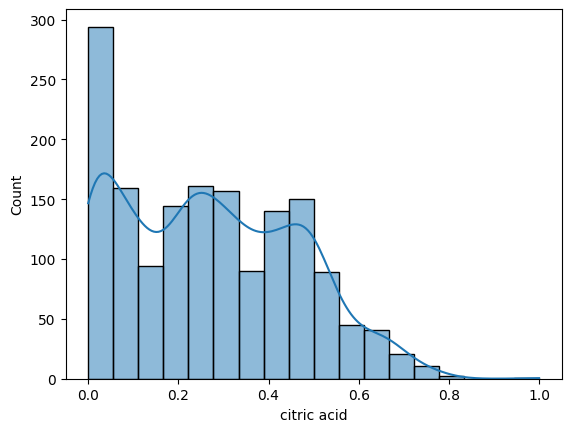

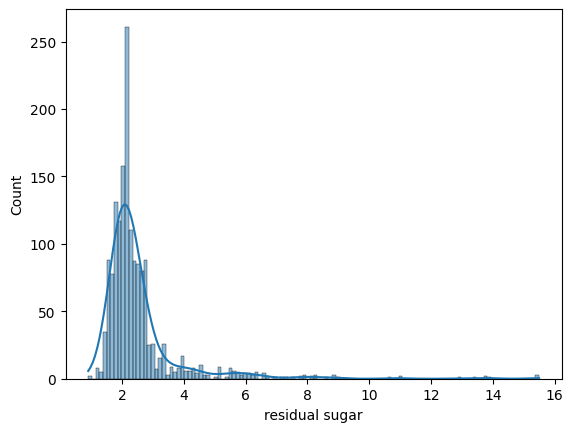

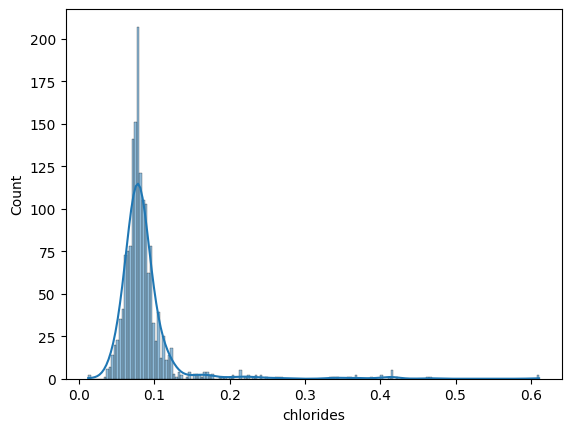

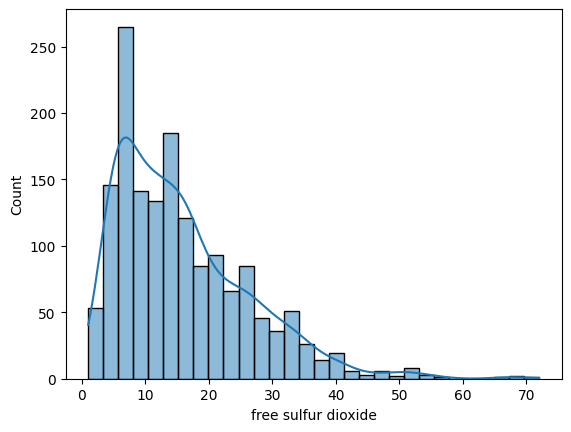

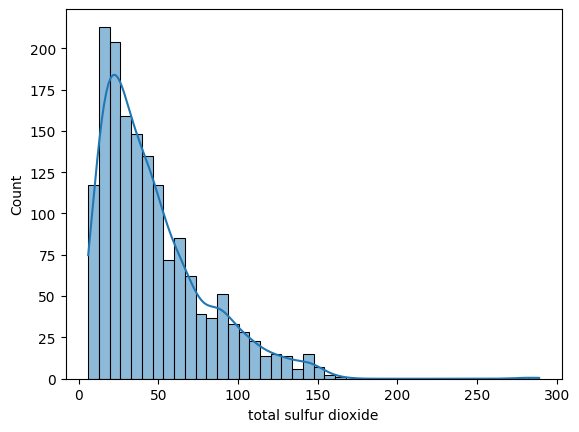

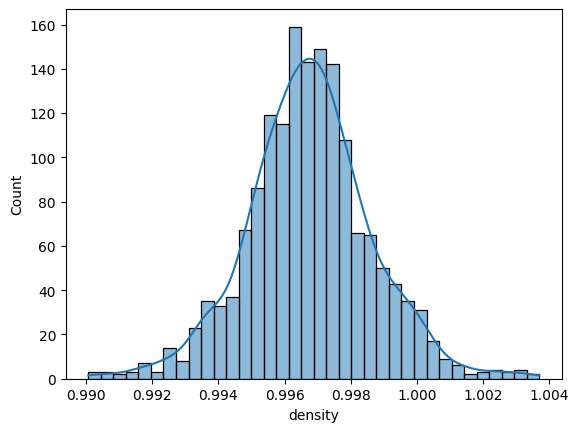

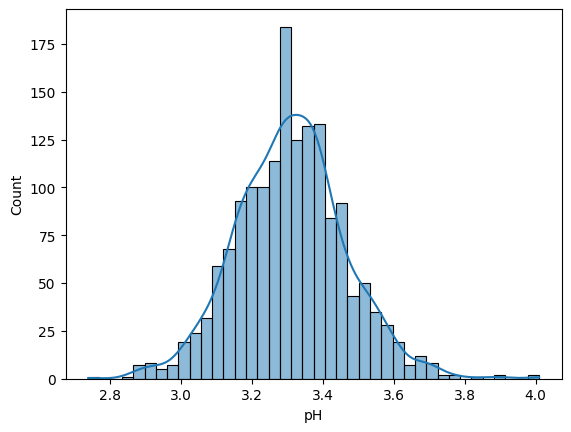

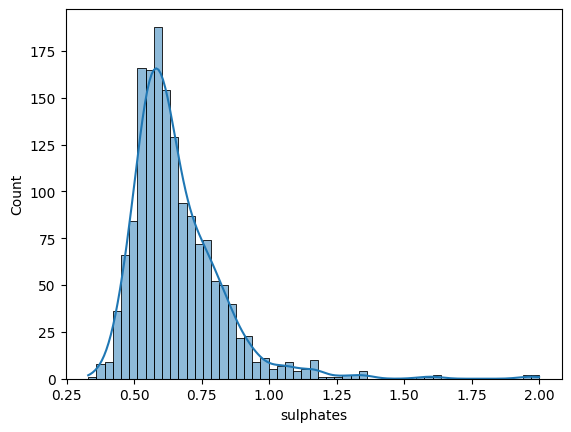

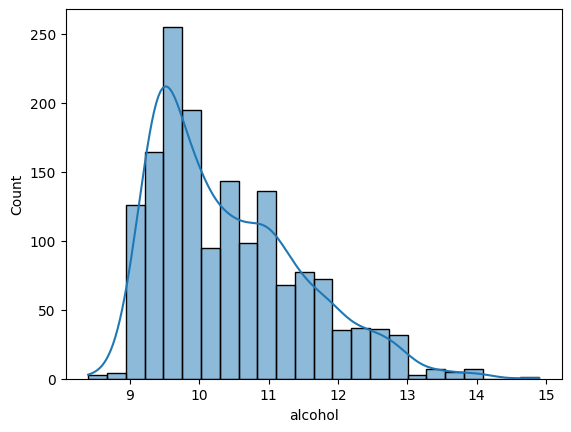

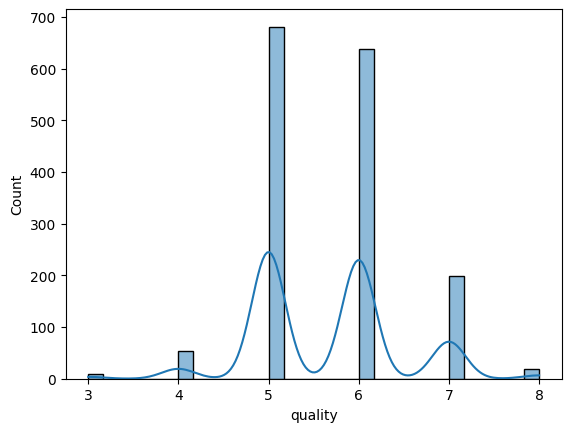

In [ ]:
for col in data.columns:
    sns.histplot(data=data,x=col,kde=True)
    plt.show()

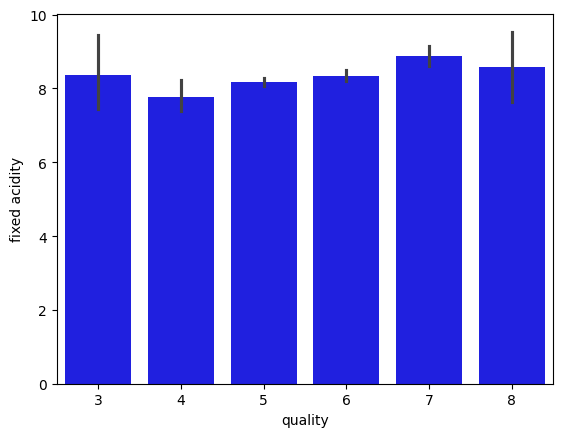

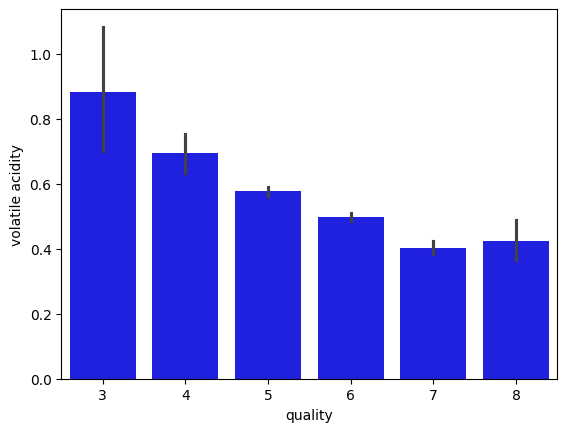

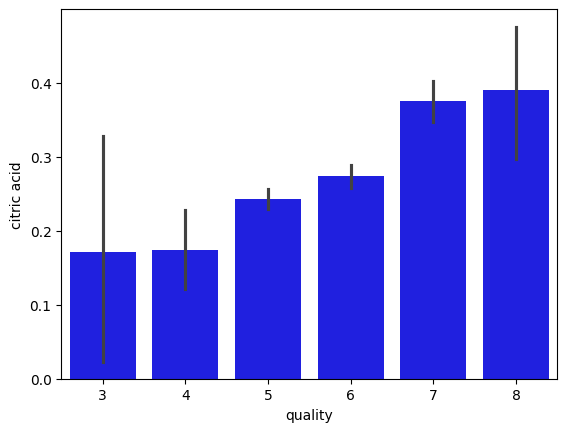

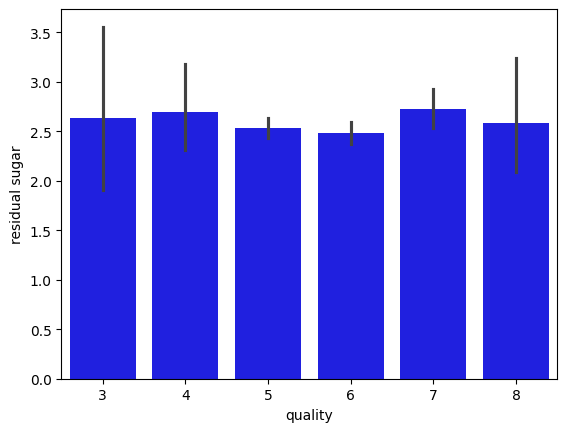

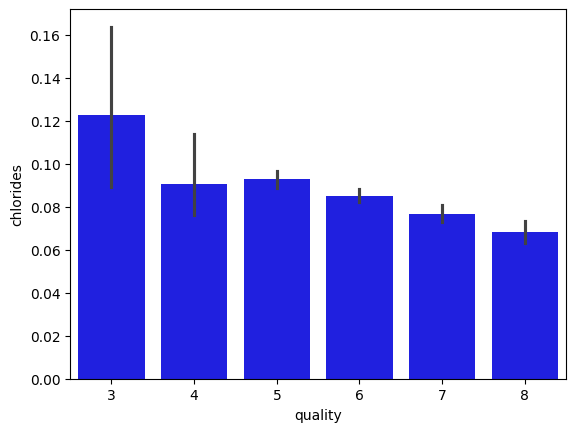

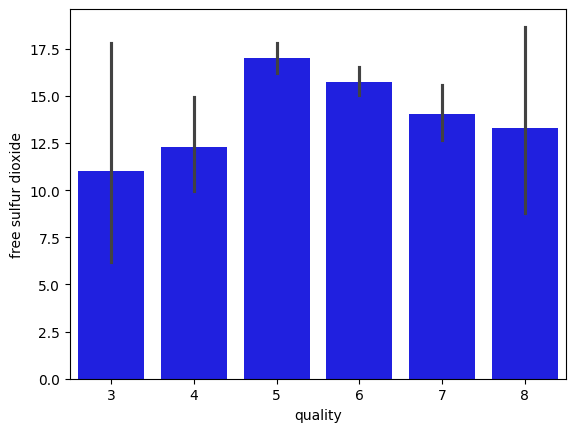

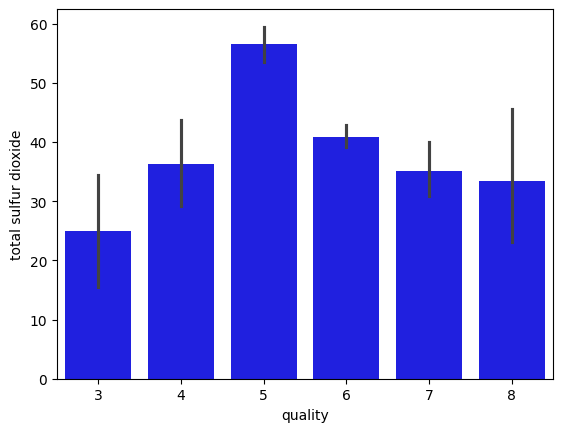

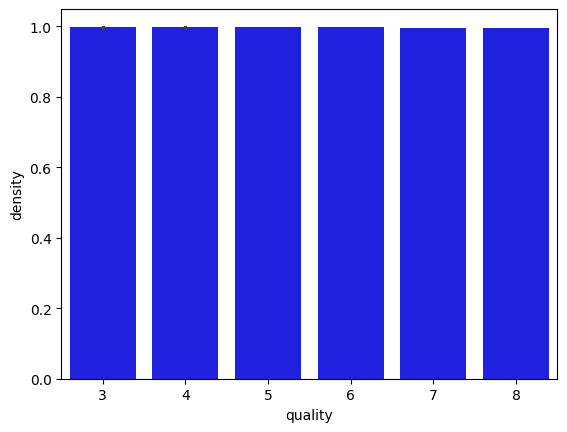

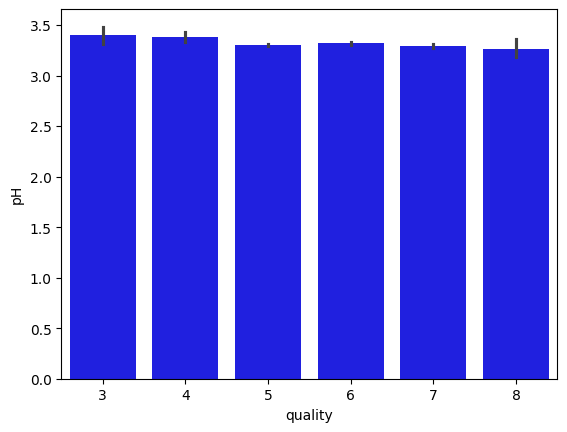

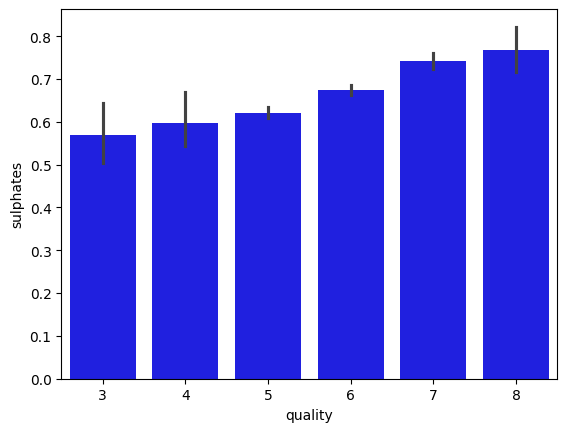

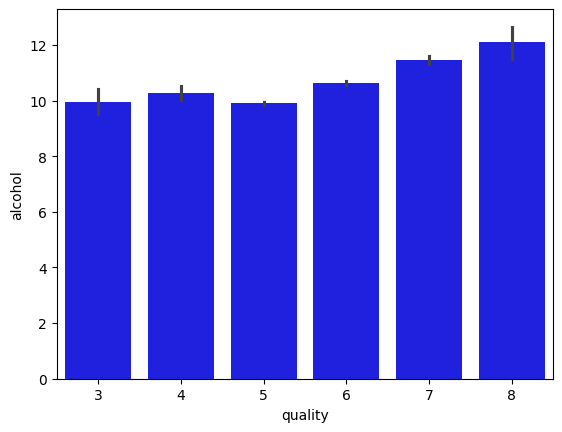

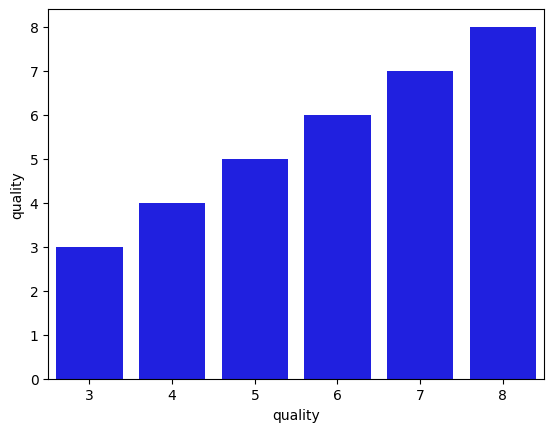

In [ ]:
for col in data.columns:
    sns.barplot(data=data,y=col,x='quality',color= 'blue')
    plt.show()

### Insight from count plot
1. pH and density are normally distributed.
2. 5 and 6 quality has more number of values.

### Insight from Bar Plot
1. Velocity acidity is not good to impove the quality.
2. Sulfer dioxide and alcohol is good to improve the quality.
3. Quality 5 and 6 has more number of values and also more number of sulferd dioxide.

# Data Preprcoessing

In [4]:
# Removing Duplicates values
data.duplicated().sum()

240

In [5]:

data.drop_duplicates(inplace=True)

In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# Renaming the column names
data.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid','residual sugar': 'residual_sugar','free sulfur dioxide': 'free_sulfur_dioxide','total sulfur dioxide': 'total_sulfur_dioxide'},inplace=True)

In [8]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

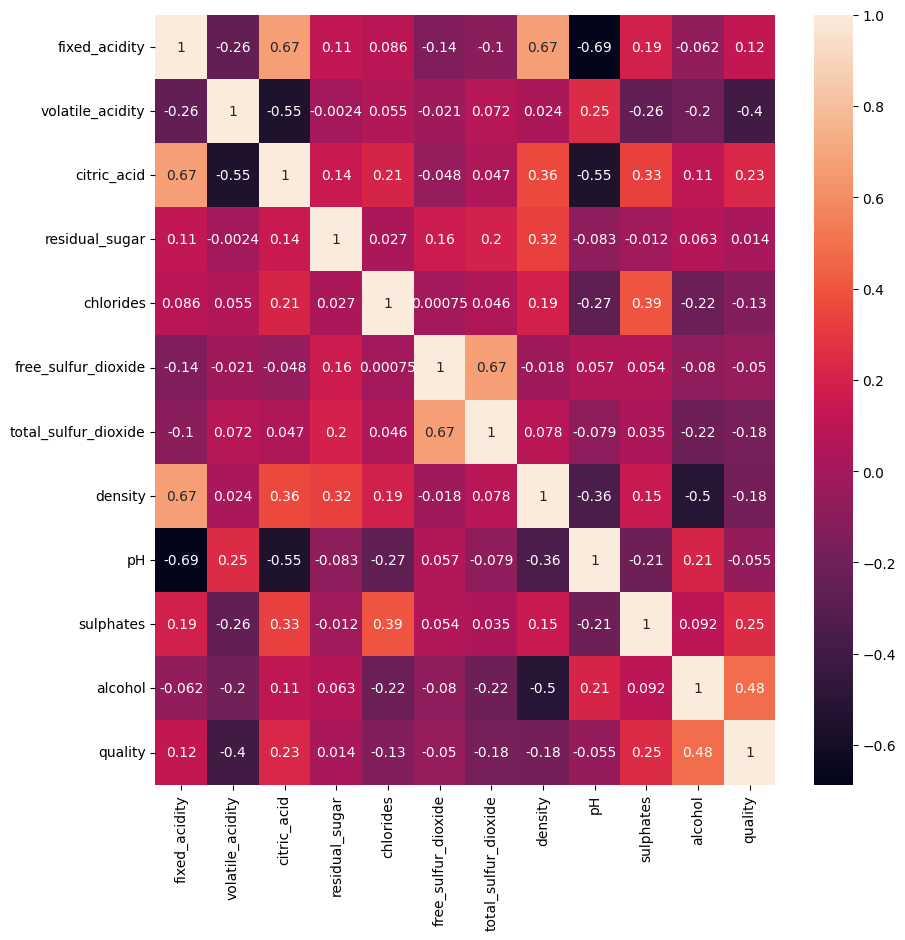

In [ ]:
# Feature Selection :- Corelation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [9]:
# Scaling :- MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df= sc.fit_transform(data.drop('quality',axis=1))

In [10]:
df=pd.DataFrame(df,columns=data.columns[:-1])

In [11]:
data['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [12]:
# Encoding
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 6:
        reviews.append('1')
    elif i >= 7 and i <= 10:
        reviews.append('2')
df['Reviews'] = reviews

In [13]:

df['Reviews'].value_counts()

Reviews
1    1175
2     184
Name: count, dtype: int64

## Model Creation for Classification

In [14]:
from sklearn.model_selection import train_test_split
x=df.drop('Reviews',axis=1)
y=df['Reviews']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Building Model :- Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
print('Confusion_matrix',confusion_matrix(y_test,y_pred))
print('Classification_report', classification_report(y_test,y_pred))
print('Test Accuracy_score',accuracy_score(y_test,y_pred))

Confusion_matrix [[235   3]
 [ 27   7]]
Classification_report               precision    recall  f1-score   support

           1       0.90      0.99      0.94       238
           2       0.70      0.21      0.32        34

    accuracy                           0.89       272
   macro avg       0.80      0.60      0.63       272
weighted avg       0.87      0.89      0.86       272

Test Accuracy_score 0.8897058823529411


In [17]:
# training accuracy
y_pred_train = clf.predict(x_train) # Predict labels for training data
print('Train Accuracy',accuracy_score(y_train, y_pred_train)) # Calculate accuracy score with true and predicted labels

Train Accuracy 0.8702851885924563


In [18]:
#AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5966386554621849

### Building Model :- SVC

In [19]:
#Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x_train,y_train)

In [20]:
# Algorithm
from sklearn.svm import SVC

model = SVC()

model.fit(x_smote, y_smote)

SVC()

In [21]:
y_pred_svc = model.predict(x_test)

In [22]:
# training accuracy
y_pred_train = model.predict(x_smote) # Predict labels for training data
print('Train Accuracy',accuracy_score(y_smote, y_pred_train)) # Calculate accuracy score with true and predicted labels

Train Accuracy 0.8537886872998933


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
print('Confusion_matrix',confusion_matrix(y_test,y_pred_svc))
print('Classification_report', classification_report(y_test,y_pred_svc))
print('Test Accuracy_score',accuracy_score(y_test,y_pred_svc))
print('ROC and AOC Score',roc_auc_score(y_test, y_pred_svc))


Confusion_matrix [[197  41]
 [  5  29]]
Classification_report               precision    recall  f1-score   support

           1       0.98      0.83      0.90       238
           2       0.41      0.85      0.56        34

    accuracy                           0.83       272
   macro avg       0.69      0.84      0.73       272
weighted avg       0.91      0.83      0.85       272

Test Accuracy_score 0.8308823529411765
ROC and AOC Score 0.8403361344537814


### Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(model,x,y,cv=10,scoring = 'accuracy')
cross_val

array([0.88970588, 0.875     , 0.88970588, 0.86764706, 0.875     ,
       0.88235294, 0.88970588, 0.86029412, 0.86029412, 0.88888889])

In [25]:
print('Cross validation score',cross_val.std())

Cross validation score 0.01140430404326647


## Decision Tree Classifier

In [26]:
#import the algoo
from sklearn.tree import DecisionTreeClassifier

#init
model = DecisionTreeClassifier()

#train
model.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [27]:
y_test_pred = model.predict(x_test)
print('Confusion_matrix',confusion_matrix(y_test,y_test_pred))
print('Classification_report', classification_report(y_test,y_test_pred))
print('Test Accuracy_score',accuracy_score(y_test,y_test_pred))
print('ROC and AOC Score',roc_auc_score(y_test, y_test_pred))

Confusion_matrix [[208  30]
 [ 12  22]]
Classification_report               precision    recall  f1-score   support

           1       0.95      0.87      0.91       238
           2       0.42      0.65      0.51        34

    accuracy                           0.85       272
   macro avg       0.68      0.76      0.71       272
weighted avg       0.88      0.85      0.86       272

Test Accuracy_score 0.8455882352941176
ROC and AOC Score 0.7605042016806722


In [28]:
y_train_pred= model.predict(x_smote)
print('Train Accuracy',accuracy_score(y_smote,y_train_pred))

Train Accuracy 1.0


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier() # by default it is building 100 estimators

model_rf.fit(x_smote,y_smote)

y_pred_rf = model_rf.predict(x_test)

In [30]:
#print('Confusion_matrix',confusion_matrix(y_test,y_pred_rf))
print('Classification_report', classification_report(y_test,y_pred_rf))
print('Test Accuracy_score',accuracy_score(y_test,y_pred_rf))
roc_auc_score(y_test, y_pred_rf)

Classification_report               precision    recall  f1-score   support

           1       0.95      0.91      0.93       238
           2       0.51      0.68      0.58        34

    accuracy                           0.88       272
   macro avg       0.73      0.79      0.76       272
weighted avg       0.90      0.88      0.89       272

Test Accuracy_score 0.8786764705882353


0.7920168067226891

In [31]:
from sklearn.metrics import confusion_matrix
print('Confusion_matrix', confusion_matrix(y_test, y_pred_rf))

Confusion_matrix [[216  22]
 [ 11  23]]



### Hyperparameter Tuning

In [32]:
param_grid = {'C':[1,5,10,50,60,70],
              'gamma':[0.1,0.01,0.001,0.02,0.032,0.001],
              'random_state':list(range(1,20))}

In [33]:
from sklearn.model_selection import GridSearchCV

svc = SVC()

grid = GridSearchCV(svc,param_grid,cv=5,scoring='accuracy')

grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.02, 0.032, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [34]:
model1 = SVC(C=10000,gamma=0.001,random_state=40)
model1.fit(x_smote,y_smote)

SVC(C=10000, gamma=0.001, random_state=40)

In [35]:
y_pred1 = model1.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred1)

0.8014705882352942

### Bagging SVC

In [37]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
base_estimator = SVC()
bagging_model = BaggingClassifier(base_estimator=base_estimator,n_estimators=100,bootstrap= True)
bagging_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=100)

In [39]:
predic = bagging_model.predict(x_test)

accuracy_score(y_test,predic)

0.9117647058823529

### XGBoosting :- Random Forest

In [41]:
!pip install xgboost

In [44]:
from xgboost import XGBClassifier

# Convert y_train labels to integers
y_train = y_train.astype(int) - 1

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
# Convert y_test labels to integers to match y_pred3
y_test = y_test.astype(int) - 1

y_pred3 = xgb.predict(x_test)
accuracy_score(y_test,y_pred3)


0.8897058823529411